In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model('model.h5')

In [4]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,789,653 (29.72 MB)

 Trainable params: 7,789,651 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [5]:
class_names = ["Alzheimer's Disease", 'Normal Category', "Parkingson's Disease"]

## Input Image Preprocessing

In [6]:
#type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.ops.image import rgb_to_grayscale

In [19]:
imge_name = 'parkinsons_T2W_FLAIR_022.png'
img_path = f'testset/{imge_name}'
image = load_img(img_path, target_size=(128, 128))
gray_image = rgb_to_grayscale(image)
input_arr = img_to_array(gray_image).reshape((1, 128, 128, 1)) # to convert the image to a batch of size 1

## Displaing Input Image

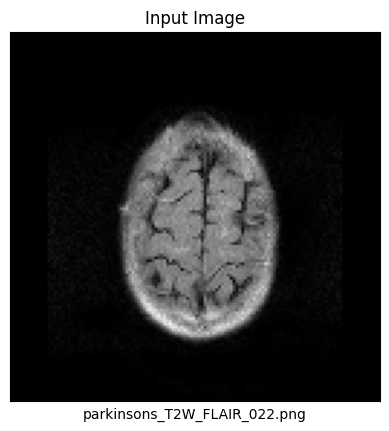

In [20]:
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.xlabel(imge_name)
plt.imshow(image)
plt.show()

## Predicting Category

In [21]:
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [22]:
predictions

array([[1.1188839e-06, 2.0675551e-02, 9.7932327e-01]], dtype=float32)

In [23]:
pred_index = np.argmax(predictions[0])
pred_probability = round(np.max(predictions[0]) * 100, 2)
pred_category = class_names[pred_index]

# **Prediction Result**

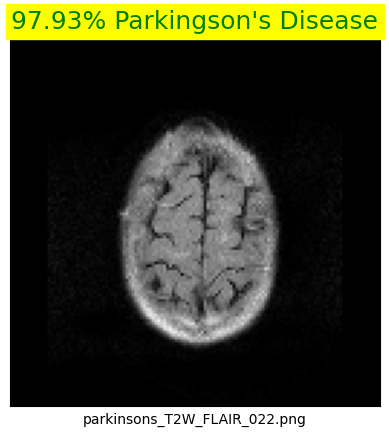

In [24]:
title_font = {
    'fontsize': 18,
    'color': 'green',
    'backgroundcolor': 'yellow'
}
plt.title(f'{pred_probability}% {pred_category}', fontdict=title_font)
plt.xticks([])
plt.yticks([])
plt.xlabel(imge_name)
plt.imshow(image)
plt.show()